In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import time
import pickle
import datetime
import holidays
import numpy as np
import pandas as pd
import pandas_profiling
from geopy.distance import geodesic 
from sklearn.metrics import r2_score
from geopy.geocoders import Nominatim
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def count(df):
  counter = {}
  for i in df:
    if i in counter:
      counter[i] += 1
    else:
      counter[i] = 1
  return counter

#Traffic Data

In [0]:
def daterange(start_date, end_date):
    delta = timedelta(hours=1)
    while start_date < end_date:
        yield start_date
        start_date += delta

In [0]:
from datetime import datetime, timedelta
timestamps =[]
start_date = datetime(2012, 1, 1, 00, 00)
end_date = datetime(2013, 1, 1, 00 ,00)
for single_date in daterange(start_date, end_date):
    timestamps.append(single_date.strftime("%Y-%m-%d %H:%M"))

In [0]:
timestamps = pd.to_datetime(timestamps)

In [0]:
df_2012_traffic = pd.read_csv('/content/drive/My Drive/SEM2/MP/dataset/2012_traffic.csv')
df_2012_traffic.head(3)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,OBJECTID_1,StationID,Direction,Volume,DateTime,ABPair,DateTimeTxt,Sta_Dir,State
0,1,P0018,N,503,2012-04-02T07:00:00.000Z,4.568746e+09,4/2/2012 7:00,P0018_N,MD
1,2,P0018,N,484,2012-04-02T08:00:00.000Z,4.568746e+09,4/2/2012 8:00,P0018_N,MD
2,3,P0018,N,533,2012-04-02T09:00:00.000Z,4.568746e+09,4/2/2012 9:00,P0018_N,MD


In [0]:
df_2012_traffic = df_2012_traffic.loc[df_2012_traffic['State']=='DC']
df_2012_traffic.head(3)

,OBJECTID_1,StationID,Direction,Volume,DateTime,ABPair,DateTimeTxt,Sta_Dir,State
1075812,1075817,2101,N,47,2012-08-07T00:00:00.000Z,2.138921e+09,8/7/2012 0:00 AM,2101_N,DC
1075813,1075818,2101,N,21,2012-08-07T01:00:00.000Z,2.138921e+09,8/7/2012 1:00 AM,2101_N,DC
1075814,1075819,2101,N,23,2012-08-07T02:00:00.000Z,2.138921e+09,8/7/2012 2:00 AM,2101_N,DC


In [0]:
df_2012_traffic.to_csv()

8784

# Downloading And Transfering


In [0]:
df = pd.read_csv("/content/2011_traffic.csv")
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,OBJECTID_1,StationID,Direction,Volume,DateTime,ABPair,DateTimeTxt,Sta_Dir,State
0,1,P0018,N,825,2011-08-15T15:00:00.000Z,4.568746e+09,8/15/2011 3:00 PM,P0018_N,MD
1,2,P0018,N,809,2011-08-15T16:00:00.000Z,4.568746e+09,8/15/2011 4:00 PM,P0018_N,MD
2,3,P0018,N,748,2011-08-15T17:00:00.000Z,4.568746e+09,8/15/2011 5:00 PM,P0018_N,MD
3,4,P0018,N,814,2011-08-15T18:00:00.000Z,4.568746e+09,8/15/2011 6:00 PM,P0018_N,MD
4,5,P0018,N,614,2011-08-15T19:00:00.000Z,4.568746e+09,8/15/2011 7:00 PM,P0018_N,MD


In [0]:
!pip install holidays

In [0]:
!pip install --upgrade pandas_profiling

     |████████████████████████████████| 245kB 2.7MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 1.5MB 34.1MB/s 
     |████████████████████████████████| 8.7MB 24.5MB/s 
     |████████████████████████████████| 614kB 34.8MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 256kB 45.4MB/s 
     |████████████████████████████████| 296kB 49.5MB/s 
     |████████████████████████████████| 307kB 48.0MB/s 
     |████████████████████████████████| 215kB 45.5MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 747kB 46.6MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
  Created wheel for tangled-up-in-unicode: filename=tangled_up_in_unicode-0.0.4-cp36-none-any.whl size=1545723 sha256=7a432c5235c89bff5ec4885e057691e1cb627c9bba78409265108a915e1e65d8
  Stored in directory: /root/.cache/pip/whee

In [0]:
!wget "http://opendata.arcgis.com/agol/arcgis/882515f07d3346c0a0c6c9672a93b8f1/5.csv?"

--2020-04-18 13:54:19--  http://opendata.arcgis.com/agol/arcgis/882515f07d3346c0a0c6c9672a93b8f1/5.csv?
Resolving opendata.arcgis.com (opendata.arcgis.com)... 52.1.1.35, 3.218.73.66, 52.22.20.95
Connecting to opendata.arcgis.com (opendata.arcgis.com)|52.1.1.35|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘5.csv?’

5.csv?                  [         <=>        ] 123.37M  73.2MB/s    in 1.7s    

2020-04-18 13:54:20 (73.2 MB/s) - ‘5.csv?’ saved [129358521]



In [0]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"

--2020-04-17 12:31:53--  https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279992 (273K) [application/x-httpd-php]
Saving to: ‘Bike-Sharing-Dataset.zip’

Bike-Sharing-Datase 100%[===================>] 273.43K  1.07MB/s    in 0.2s    

2020-04-17 12:31:54 (1.07 MB/s) - ‘Bike-Sharing-Dataset.zip’ saved [279992/279992]



In [0]:
!unzip "/content/Bike-Sharing-Dataset.zip"

Archive:  /content/Bike-Sharing-Dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


In [0]:
!mv "/content/2012Q4-capitalbikeshare-tripdata.csv" "/content/drive/My Drive/SEM2/MP/dataset"

In [0]:
!wget "https://s3.amazonaws.com/capitalbikeshare-data/2012-capitalbikeshare-tripdata.zip"

--2020-04-17 12:37:53--  https://s3.amazonaws.com/capitalbikeshare-data/2012-capitalbikeshare-tripdata.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.147.21
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.147.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43460762 (41M) [application/zip]
Saving to: ‘2012-capitalbikeshare-tripdata.zip’

2012-capitalbikesha 100%[===================>]  41.45M  85.4MB/s    in 0.5s    

2020-04-17 12:37:54 (85.4 MB/s) - ‘2012-capitalbikeshare-tripdata.zip’ saved [43460762/43460762]



In [0]:
!unzip "/content/2012-capitalbikeshare-tripdata.zip"

Archive:  /content/2012-capitalbikeshare-tripdata.zip
  inflating: 2012Q1-capitalbikeshare-tripdata.csv  
  inflating: 2012Q2-capitalbikeshare-tripdata.csv  
  inflating: 2012Q3-capitalbikeshare-tripdata.csv  
  inflating: 2012Q4-capitalbikeshare-tripdata.csv  


In [0]:
!mv "/content/2011_12_wow.csv" "/content/drive/My Drive/SEM2/MP/dataset/"

In [0]:
!mv "/content/2011  _traffic.csv" "/content/drive/My Drive/SEM2/MP/dataset/"

# Combining ONLY washington dataset

In [0]:
# df_2011 = pd.read_csv("/content/drive/My Drive/SEM2/MP/dataset/2011-capitalbikeshare-tripdata.csv")
df_2012_q1 = pd.read_csv("/content/drive/My Drive/SEM2/MP/dataset/2012Q1-capitalbikeshare-tripdata.csv")
df_2012_q1['Start date'] = pd.to_datetime(df_2012_q1['Start date'])
df_2012_q2 = pd.read_csv("/content/drive/My Drive/SEM2/MP/dataset/2012Q2-capitalbikeshare-tripdata.csv")
df_2012_q2['Start date'] = pd.to_datetime(df_2012_q2['Start date'])
df_2012_q3 = pd.read_csv("/content/drive/My Drive/SEM2/MP/dataset/2012Q3-capitalbikeshare-tripdata.csv")
df_2012_q3['Start date'] = pd.to_datetime(df_2012_q3['Start date'])
df_2012_q4 = pd.read_csv("/content/drive/My Drive/SEM2/MP/dataset/2012Q4-capitalbikeshare-tripdata.csv")
df_2012_q4['Start date'] = pd.to_datetime(df_2012_q4['Start date'])

In [0]:
# print(df_2011.shape[0])
print(df_2012_q1.shape[0])
print(df_2012_q2.shape[0])
print(df_2012_q3.shape[0])
print(df_2012_q4.shape[0])

361317
566832
629917
470845


In [0]:
# frame_list = [df_2011,df_2012_q1,df_2012_q2,df_2012_q3,df_2012_q4]
# df_2011_12 = pd.concat(frame_list,ignore_index=True)
# df_2011_12.shape[0]

3255678

In [0]:
df_2011_12.to_csv(path_or_buf="/content/2011_12_wow.csv")

# Combining with weather data

In [0]:
def get_distance(df):
  index = 0
  distance = []
  temp_dict = {}
  geolocator = Nominatim(user_agent="Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:75.0) Gecko/20100101 Firefox/75.0")
  for src, dest in zip(df["Start station"],df["End station"]):
    # if index in range(0,1000000,10000):
    #   print(index)
    if src == dest:
      distance.append(0.01)
      index += 1
      # print(0.01)
    elif (src+" "+dest) in temp_dict:
      distance.append(temp_dict[src+" "+dest])
      index += 1
      # print(temp_dict[src+" "+dest])
    else:
      try:
        # Loading the lat-long data 
        location = geolocator.geocode(src)
        source = (location.latitude, location.longitude)
        # print(str(location.latitude)+" "+str(location.longitude))
        location = geolocator.geocode(dest)
        destination = (location.latitude, location.longitude)
        # print(str(location.latitude)+" "+str(location.longitude))
        # Print the distance calculated in km 
        dis = geodesic(source, destination).miles
        temp_dict[src+" "+dest] = dis
        distance.append(dis)
        # print(dis)
      except AttributeError:
        distance.append(0)
        # print(0)
      except:
        distance.append(0)
        time.sleep(0.1)
        # print(0)
      finally:
        index += 1
  return distance,temp_dict

In [0]:
def traffic_hour_list(df):
  traffic_hour = []
  # if (in_hour >= 8 and in_hour <= 12) or (in_hour >= 16 and in_hour <= 20):
  for date1 in df["Start date"]:
    in_hour = date1.hour
    if (in_hour in range(8,13)) or (in_hour in range(16,21)):
      traffic_hour.append(1)
    else:
      traffic_hour.append(0)
  return traffic_hour

In [0]:
def working_day_list(df):
  working_day = []
  # if (in_hour >= 8 and in_hour <= 12) or (in_hour >= 16 and in_hour <= 20):
  for date1 in df["Start date"]:
    in_date = date1.date()
    if (in_date.weekday() in range(0,5)and in_date not in holidays.UnitedStates()):
      working_day.append(1)
    else:
      working_day.append(0)
  return working_day

In [0]:
def get_day_part(df):
  # 4 to 10 Morning
  # 10 to 15 Noon
  # 15 to 20 evening
  # 20 to 5 Night
  index = 0
  mor = []
  noon = []
  eve = []
  night = []
  for timestamp in df['Start date']:
    # if index in range(0,3800000,10000):
    #   print(index)
    hour = timestamp.hour
    if (hour in range(4,10)):
      mor.append(1)
      noon.append(0)
      eve.append(0)
      night.append(0)
    elif (hour in range(10,15)):
      mor.append(0)
      noon.append(1)
      eve.append(0)
      night.append(0)
    elif (hour in range(15,20)):
      mor.append(0)
      noon.append(0)
      eve.append(1)
      night.append(0)
    else:
      mor.append(0)
      noon.append(0)
      eve.append(0)
      night.append(1)
    index += 1
  return mor, noon, eve, night

In [0]:
def get_with_weather(df_washington,df_weather):
  weathersit = []
  temp = []
  atemp = []
  hum = []
  windspeed = []
  index = 0
  for date in df_washington["Start date"]:
    if index in range(0,3800000,10000):
      print(index)
    temp_df = df_weather.loc[(df_weather['dteday']==str(date.date()))&(df_weather['hr']==date.hour)]
    # print(temp_df.head(n=1))
    # print(temp_df['weathersit'].iloc[0])
    # print(temp_df['temp'].iloc[0])
    # print(temp_df['atemp'].iloc[0])
    # print(temp_df['hum'].iloc[0])
    # print(temp_df['windspeed'].iloc[0])
    # print(index)
    # print(date.date())
    # print(date.hour)
    try:
      weathersit.append(temp_df['weathersit'].iloc[0])
      temp.append(temp_df['temp'].iloc[0])
      atemp.append(temp_df['atemp'].iloc[0])
      hum.append(temp_df['hum'].iloc[0])
      windspeed.append(temp_df['windspeed'].iloc[0])
    except IndexError:
      weathersit.append(weathersit[-1])
      temp.append(temp[-1])
      atemp.append(atemp[-1])
      hum.append(hum[-1])
      windspeed.append(windspeed[-1])
    finally:
      index += 1
  data = [ weathersit, temp, atemp, hum, windspeed]
  df_washington['weathersit'] = weathersit
  df_washington['temp'] = temp
  df_washington['atemp'] = atemp
  df_washington['hum'] = hum
  df_washington['windspeed'] = windspeed
  return df_washington

In [0]:
# df_2011_12_wow = pd.read_csv("/content/drive/My Drive/SEM2/MP/dataset/2011_12_wow.csv")
# df_2011_12_wow['Start date'] = pd.to_datetime(df_2011_12_wow['Start date'])
# df_2011_12_wow['End date'] = pd.to_datetime(df_2011_12_wow['End date']) 
# df_2011_12_wow.head()

In [0]:
df_weather_hour = pd.read_csv("/content/drive/My Drive/SEM2/MP/dataset/hour.csv")
df_weather_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Q1 Only

In [0]:
df_q1_weather = df_weather_hour.loc[(df_weather_hour['dteday']>='2012-01-01')&(df_weather_hour['dteday']<'2012-04-01')]

In [0]:
df_q1_waw = get_with_weather(df_2012_q1,df_q1_weather)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000


In [0]:
df_q1_waw.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,weathersit,temp,atemp,hum,windspeed
0,475,2012-01-01 00:04:00,2012-01-01 00:11:56,31245,7th & R St NW / Shaw Library,31109,7th & T St NW,W01412,Member,1,0.36,0.3788,0.66,0.0
1,1162,2012-01-01 00:10:05,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00524,Casual,1,0.36,0.3788,0.66,0.0
2,1145,2012-01-01 00:10:23,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00235,Member,1,0.36,0.3788,0.66,0.0
3,485,2012-01-01 00:15:41,2012-01-01 00:23:46,31101,14th & V St NW,31602,Park Rd & Holmead Pl NW,W00864,Member,1,0.36,0.3788,0.66,0.0
4,471,2012-01-01 00:15:42,2012-01-01 00:23:34,31102,11th & Kenyon St NW,31109,7th & T St NW,W00995,Member,1,0.36,0.3788,0.66,0.0


In [0]:
df_q1_waw.to_csv("2012_Q1_withweather.csv")

In [0]:
df_q1_waw.shape

(361317, 14)

In [0]:
!mv "/content/2012_Q1_withweather.csv" "/content/drive/My Drive/SEM2/MP/dataset/"

# Q2 only


In [0]:
df_q2_weather = df_weather_hour.loc[(df_weather_hour['dteday']>='2012-04-01')&(df_weather_hour['dteday']<'2012-07-01')]

In [0]:
df_q2_waw = get_with_weather(df_2012_q2,df_q2_weather)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000


In [0]:
df_q2_waw.to_csv("2012_Q2_withweather.csv")

In [0]:
df_q2_waw.shape

(566832, 14)

In [0]:
!mv "/content/2012_Q2_withweather.csv" "/content/drive/My Drive/SEM2/MP/dataset/"

# Q3 Only

In [0]:
df_q3_weather = df_weather_hour.loc[(df_weather_hour['dteday']>='2012-07-01')&(df_weather_hour['dteday']<'2012-10-01')]

In [0]:
df_q3_waw = get_with_weather(df_2012_q3,df_q3_weather)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000


In [0]:
df_q3_waw.to_csv("2012_Q3_withweather.csv")

In [0]:
!mv "/content/2012_Q3_withweather.csv" "/content/drive/My Drive/SEM2/MP/dataset/"

# Q4 Only

In [0]:
df_q4_weather = df_weather_hour.loc[(df_weather_hour['dteday']>='2012-10-01')&(df_weather_hour['dteday']<'2013-01-01')]

In [0]:
df_q4_waw = get_with_weather(df_2012_q4,df_q4_weather)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000


In [0]:
df_q4_waw.to_csv("2012_Q4_withweather.csv")

In [0]:
!mv "/content/2012_Q4_withweather.csv" "/content/drive/My Drive/SEM2/MP/dataset/"

In [0]:
df_q4_waw.shape

(470845, 14)

# Only Season

In [0]:
def get_with_season(df_washington,df_weather):
  season = []
  index = 0
  for date in df_washington["Start date"]:
    if index in range(0,3800000,10000):
      print(index)
    temp_df = df_weather.loc[(df_weather['dteday']==str(date.date()))&(df_weather['hr']==date.hour)]
    # print(temp_df.head(n=1))
    # print(temp_df['weathersit'].iloc[0])
    # print(temp_df['temp'].iloc[0])
    # print(temp_df['atemp'].iloc[0])
    # print(temp_df['hum'].iloc[0])
    # print(temp_df['windspeed'].iloc[0])
    # print(index)
    # print(date.date())
    # print(date.hour)
    try:
      season.append(temp_df['season'].iloc[0])
    except IndexError:
      season.append(season[-1])
    finally:
      index += 1
  df_washington['season'] = season
  return df_washington

In [0]:
df_weather_hour = pd.read_csv("/content/drive/My Drive/SEM2/MP/dataset/hour.csv")
df_weather_hour.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [0]:
df_2012_wd = pd.read_csv("/content/drive/My Drive/SEM2/MP/dataset/2012_wd2.csv")
df_2012_wd['Start date'] = pd.to_datetime(df_2012_wd['Start date'])
df_2012_wd.head(3)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,weathersit,temp,atemp,hum,windspeed,distance,traffic_hour,working_day
0,475,2012-01-01 00:04:00,2012-01-01 00:11:56,31245,7th & R St NW / Shaw Library,31109,7th & T St NW,W01412,Member,1,0.36,0.3788,0.66,0.0,0.192336,0,0
1,1162,2012-01-01 00:10:05,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00524,Casual,1,0.36,0.3788,0.66,0.0,0.941258,0,0
2,1145,2012-01-01 00:10:23,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00235,Member,1,0.36,0.3788,0.66,0.0,0.941258,0,0


In [0]:
df_2012_wd = get_with_season(df_2012_wd,df_weather_hour)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
13

In [0]:
df_2012_wd.head(3)

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,weathersit,temp,atemp,hum,windspeed,distance,traffic_hour,working_day,season
0,475,2012-01-01 00:04:00,2012-01-01 00:11:56,31245,7th & R St NW / Shaw Library,31109,7th & T St NW,W01412,Member,1,0.36,0.3788,0.66,0.0,0.192336,0,0,1
1,1162,2012-01-01 00:10:05,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00524,Casual,1,0.36,0.3788,0.66,0.0,0.941258,0,0,1
2,1145,2012-01-01 00:10:23,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00235,Member,1,0.36,0.3788,0.66,0.0,0.941258,0,0,1


In [0]:
df_2012_wd.to_csv("2012_wd2.csv",index=False)

In [0]:
!mv '/content/2012_wd2.csv' '/content/drive/My Drive/SEM2/MP/dataset/2012_wd2.csv'

# Other

In [0]:
len(df_feb['Start station'].unique())

148

In [0]:
len(df_feb['End station'].unique())

148

In [0]:
df_feb.shape

(102235, 9)

In [0]:
df_mar.shape

(163211, 9)

In [0]:
distance,temp_dict = get_distance(df_jan)

0


In [0]:
#Getting boolean working hour and working day list
# working_hour = working_hour_list(df_2011_12_wow)
with open('/content/drive/My Drive/SEM2/MP/dataset/working_hour.data', 'rb') as filehandle:
    # read the data as binary data stream
    working_hour = pickle.load(filehandle)

In [0]:
# with open('/content/drive/My Drive/SEM2/MP/dataset/working_hour.data', 'wb') as filehandle:
#     # store the data as binary data stream
#     pickle.dump(working_hour, filehandle)

In [0]:
# working_day = working_day_list(df_2011_12_wow)
with open('/content/drive/My Drive/SEM2/MP/dataset/working_day.data', 'rb') as filehandle:
    # read the data as binary data stream
    working_day = pickle.load(filehandle)

In [0]:
# with open('/content/drive/My Drive/SEM2/MP/dataset/working_day.data', 'wb') as filehandle:
#     # store the data as binary data stream
#     pickle.dump(working_day, filehandle)

In [0]:
# distance = get_distance(df_2011_12_wow)

In [0]:
final_df = get_with_weather(df_2011_12_wow,df_weather_hour)

[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000, 250000, 260000, 270000, 280000, 290000, 300000, 310000, 320000, 330000, 340000, 350000, 360000]


# Predicting Duration

In [0]:
df_2012_wd = pd.read_csv("/content/drive/My Drive/SEM2/MP/dataset/2012_wd2.csv")
df_2012_wd['Start date'] = pd.to_datetime(df_2012_wd['Start date'])
df_2012_wd.head(3)

,Unnamed: 0,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,weathersit,temp,atemp,hum,windspeed,distance,traffic_hour,working_day,season
0,0,475,2012-01-01 00:04:00,2012-01-01 00:11:56,31245,7th & R St NW / Shaw Library,31109,7th & T St NW,W01412,Member,1,0.36,0.3788,0.66,0.0,0.192336,0,0,1
1,1,1162,2012-01-01 00:10:05,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00524,Casual,1,0.36,0.3788,0.66,0.0,0.941258,0,0,1
2,2,1145,2012-01-01 00:10:23,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00235,Member,1,0.36,0.3788,0.66,0.0,0.941258,0,0,1


In [0]:
hour = []
for date in df_2012_wd['Start date']:
  hour.append(date.hour)

In [0]:
df_2012_wd['hr'] = hour

Coverting  Member type to digit

In [0]:
df_2012_wd['Member type'] = df_2012_wd['Member type'].replace({'Member':1,'Casual':0,'Unknown': 0})

In [0]:
count(np.asarray(df_2012_wd["Member type"]))

NameError: ignored

Handling categorical data

In [0]:
enc_df = df_2012_wd[['weathersit','season']]

In [0]:
# importing one hot encoder from sklearn 
from sklearn.preprocessing import OneHotEncoder  
# creating one hot encoder object by default 
# entire data passed is one hot encoded 
onehotencoder = OneHotEncoder() 
data = onehotencoder.fit_transform(enc_df).toarray() 


In [0]:
clear = []
mist = []
light_rain = []
heavy_rain = []
springer = []
summer = []
fall = []
winter = []
for row in data:
  clear.append(row[0]) 
  mist.append(row[1])
  light_rain.append(row[2])
  heavy_rain.append(row[3])
  springer.append(row[4])
  summer.append(row[5])
  fall.append(row[6])
  winter.append(row[7])

In [0]:
df_2012_wd['clear'] = clear
df_2012_wd['mist'] = mist
df_2012_wd['light_rain'] = light_rain
df_2012_wd['heavy_rain'] = heavy_rain
df_2012_wd['springer'] = springer
df_2012_wd['summer'] = summer
df_2012_wd['fall'] = fall
df_2012_wd['winter'] = winter

In [0]:
df_2012_wd = df_2012_wd.drop(['weathersit','season'],axis =1)

In [0]:
df_2012_wd.head(1)

,Unnamed: 0,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,temp,atemp,hum,windspeed,distance,traffic_hour,working_day,hr,clear,mist,light_rain,heavy_rain,springer,summer,fall,winter
0,0,475,2012-01-01 00:04:00,2012-01-01 00:11:56,31245,7th & R St NW / Shaw Library,31109,7th & T St NW,W01412,1,0.36,0.3788,0.66,0.0,0.192336,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Extra featurs

In [0]:
mor, noon, eve, night = get_day_part(df_2012_wd)

In [0]:
df_2012_wd['morning'] = mor
df_2012_wd['noon'] = noon
df_2012_wd['evening'] = eve
df_2012_wd['night'] = night

In [0]:
df_2012_wd.head(1)

,Unnamed: 0,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,temp,atemp,hum,windspeed,distance,traffic_hour,working_day,hr,clear,mist,light_rain,heavy_rain,springer,summer,fall,winter,morning,noon,evening,night
0,0,475,2012-01-01 00:04:00,2012-01-01 00:11:56,31245,7th & R St NW / Shaw Library,31109,7th & T St NW,W01412,1,0.36,0.3788,0.66,0.0,0.192336,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,1


In [0]:
df_2012_wd = df_2012_wd.drop(columns=['Start date','End date','Start station number','End station number','Bike number'])

In [0]:
df_2012_wd.to_csv("2012_predDuration.csv",index=False)

In [0]:
!mv '/content/2012_predDuration.csv' '/content/drive/My Drive/SEM2/MP/dataset/2012_predDuration.csv'

In [0]:
traffic_hour = traffic_hour_list(df_2012_wd)
working_day = working_day_list(df_2012_wd)
df_2012_wd['traffic_hour'] = traffic_hour
df_2012_wd['working_day'] = working_day
df_2012_wd.to_csv('2012_wd2.csv')
!mv "/content/2012_wd2.csv" "/content/drive/My Drive/SEM2/MP/dataset/"

# Predicting Destination


In [0]:
# with open('/content/drive/My Drive/SEM2/MP/dataset/src_label.data', 'wb') as filehandle:
#     # store the data as binary data stream
#     pickle.dump(src_label, filehandle)
# with open('/content/drive/My Drive/SEM2/MP/dataset/dest_label.data', 'wb') as filehandle:
#     # store the data as binary data stream
#     pickle.dump(dest_label, filehandle)

In [0]:
with open('/content/drive/My Drive/SEM2/MP/dataset/lat_lon_dic.data', 'rb') as filehandle:
    # read the data as binary data stream
    lat_lon_dic = pickle.load(filehandle)

In [15]:
df_2012_wd = pd.read_csv("/content/drive/My Drive/SEM2/MP/dataset/2012_wd2.csv")
df_2012_wd['Start date'] = pd.to_datetime(df_2012_wd['Start date'])
df_2012_wd.head(3)

,Unnamed: 0,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,weathersit,temp,atemp,hum,windspeed,distance,traffic_hour,working_day,season
0,0,475,2012-01-01 00:04:00,2012-01-01 00:11:56,31245,7th & R St NW / Shaw Library,31109,7th & T St NW,W01412,Member,1,0.36,0.3788,0.66,0.0,0.192336,0,0,1
1,1,1162,2012-01-01 00:10:05,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00524,Casual,1,0.36,0.3788,0.66,0.0,0.941258,0,0,1
2,2,1145,2012-01-01 00:10:23,2012-01-01 00:29:28,31400,Georgia & New Hampshire Ave NW,31103,16th & Harvard St NW,W00235,Member,1,0.36,0.3788,0.66,0.0,0.941258,0,0,1


In [0]:
mem = []
for i in df_2012_wd['Member type']:
  if i == 'Member':
    mem.append(1)
  else:
    mem.append(0)

In [0]:
df_2012_wd['Member type'] = mem

In [0]:
df = pd.DataFrame()

In [0]:
place = []
lat = []
lon = []
for key in list(lat_lon_dic.keys()):
  place.append(key)
  lat.append(lat_lon_dic[key][0])
  lon.append(lat_lon_dic[key][1])

In [0]:
df['place'] = place
df['lat'] = lat
df['lon'] = lon

In [0]:
X=df.loc[:,['place','lat','lon']]
X.head(3)

,place,lat,lon
0,7th & R St NW / Shaw Library,38.912728,-77.022593
1,Georgia & New Hampshire Ave NW,38.936043,-77.024649
2,14th & V St NW,38.917600,-77.032100


In [0]:
db = DBSCAN(eps=0.3, min_samples=2).fit(X[X.columns[1:3]])
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])

In [0]:
# kmeans = KMeans(n_clusters = 3, init ='k-means++')
# kmeans.fit(X[X.columns[1:3]]) 
# # Compute k-means clustering.
# X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
# centers = kmeans.cluster_centers_ 
# # Coordinates of cluster centers.
# labels = kmeans.predict(X[X.columns[1:3]]) 
# # Labels of each point
# X.head(3)

,place,lat,lon,cluster_label
0,7th & R St NW / Shaw Library,38.912728,-77.022593,0
1,Georgia & New Hampshire Ave NW,38.936043,-77.024649,0
2,14th & V St NW,38.917600,-77.032100,0


In [0]:
count(np.asarray(X['cluster_label']))

{0: 52, 1: 85, 2: 54}

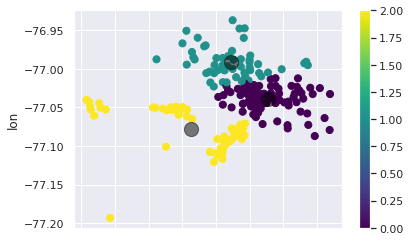

In [0]:
X.plot.scatter(x = 'lat', y = 'lon', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [0]:
dic_label = {}
for place,lbl in zip(X['place'],X['cluster_label']):
  dic_label[place] = lbl

In [0]:
src_label=[]
for place in df_2012_wd['Start station']:
  src_label.append(dic_label[place])

In [0]:
dest_label=[]
for place in df_2012_wd['End station']:
  dest_label.append(dic_label[place])

In [0]:
count(dest_label)

{0: 1358439, 1: 523192, 2: 147280}

In [0]:
count(src_label)

{0: 1373498, 1: 504112, 2: 151301}

In [0]:
df_2012_wd['src_label'] = src_label
df_2012_wd['dest_label'] = dest_label

In [0]:
df_2012_wd.head(1)

,Unnamed: 0,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,weathersit,temp,atemp,hum,windspeed,distance,traffic_hour,working_day,season,src_label,dest_label
0,0,475,2012-01-01 00:04:00,2012-01-01 00:11:56,31245,7th & R St NW / Shaw Library,31109,7th & T St NW,W01412,1,1,0.36,0.3788,0.66,0.0,0.192336,0,0,1,0,0


In [0]:
df_2012_wd = df_2012_wd.drop(columns=['Duration','Start date','End date','Start station number','End station number','Bike number','distance'])

In [0]:
df_2012_wd.head(1)

,Unnamed: 0,Start station,End station,Member type,weathersit,temp,atemp,hum,windspeed,traffic_hour,working_day,season,src_label,dest_label
0,0,7th & R St NW / Shaw Library,7th & T St NW,1,1,0.36,0.3788,0.66,0.0,0,0,1,0,0


In [0]:
df_2012_wd.to_csv("2012_preddest.csv",index=False)

In [0]:
!mv '/content/2012_preddest.csv' '/content/drive/My Drive/SEM2/MP/dataset/2012_preddest.csv'

In [16]:
df_2012_preddest = pd.read_csv('/content/drive/My Drive/SEM2/MP/dataset/2012_preddest.csv')
df_2012_preddest.head(1)

,Unnamed: 0,Start station,End station,Member type,weathersit,temp,atemp,hum,windspeed,traffic_hour,working_day,season,src_label,dest_label
0,0,7th & R St NW / Shaw Library,7th & T St NW,1,1,0.36,0.3788,0.66,0.0,0,0,1,0,0


In [17]:
count(np.asarray(df_2012_preddest['dest_label']))

{0: 1358439, 1: 523192, 2: 147280}

In [0]:
# 835247
df_0 = df_2012_preddest.loc[df_2012_preddest['dest_label'] == 0]
df_1 = df_2012_preddest.loc[df_2012_preddest['dest_label'] == 1]
df_2 = df_2012_preddest.loc[df_2012_preddest['dest_label'] == 2]

In [0]:
df_0 = df_0.sample(145000)
df_1 = df_1.sample(145000)
df_2 = df_2.sample(145000)

In [0]:
df_2012_preddest = pd.concat([df_0, df_1, df_2], ignore_index=True)
df_2012_preddest.reset_index(inplace = True)

In [23]:
count(np.asarray(df_2012_preddest['dest_label']))

{0: 145000, 1: 145000, 2: 145000}

In [0]:
df_2012_preddest.to_csv("2012_preddest_bal.csv",index=False)

In [0]:
!mv '/content/2012_preddest_bal.csv' '/content/drive/My Drive/SEM2/MP/dataset/2012_preddest_bal.csv'